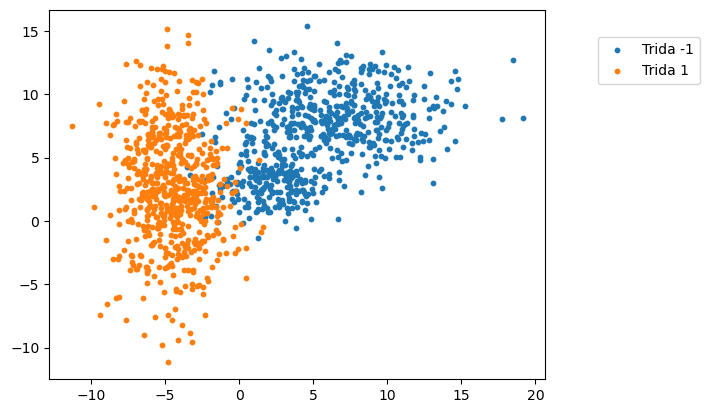

PyObject <matplotlib.legend.Legend object at 0x7fb6ef8a8b50>

In [1]:
using PyPlot
using Distributions


# Log regrese

# generovani 2D dat

mean1 = [2.,3.]
C = [3.5 0; 0 1.8]
d = MvNormal(mean1, C)
x1 = rand(d, 200)'

mean2 = [-4.5,2.75]
C2 = [3.5 0; 0 20.1]
d2 = MvNormal(mean2, C2)
x2 = rand(d2, 650)'

mean3 = [6.5,8.2]
C3 = [14.5 0; 0 5.8]
d3 = MvNormal(mean3, C3)
x3 = rand(d3, 450)'


y1 = -1.0.*ones(size(x1)[1])
y2 = ones(size(x2)[1])
y3 = -1.0.*ones(size(x3)[1])


x1 = vcat(x1,x3)
y1 = vcat(y1,y3)

X = vcat(x1,x2)
y = vcat(y1,y2)

fig = figure()
PyPlot.scatter(x1[:,1],x1[:,2], s=10, label="Trida -1")
PyPlot.scatter(x2[:,1],x2[:,2], s=10, label="Trida 1")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [2]:
H(x::AbstractFloat) = ifelse(x <= 0, zero(x), ifelse(x > 0, one(x), oftype(x,0.5)))

function grad_w(X,y,w,b)
    
    m = H.(-y.*(X*w .+ b[1]))
    g = (-m.*y).*X    
    return sum(g,dims=1)'
end

function grad_b(X,y,w,b)

    m = H.(-y.*(X*w .+ b[1]))
    g = -(m.*y)
    
    return sum(g,dims=1)'
end

function grad_descend(X,y,w0,b0, step_w, step_b, l1, l2)
    i = 0
    g_norm_w = 1.0    
    g_norm_b = 1.0
    
    while (i<1.0e4)
        
        i=i+1
        g_w = grad_w(X,y,w0,b0) .+ l1.*w0
        g_b = grad_b(X,y,w0,b0) .+ l2.*b0
        
        
        w1 = w0 .- step_w.*(g_w)
        b1 = b0 .- step_b.*(g_b)
        
        w0 = w1
        b0 = b1
        
        g_norm_w = sqrt(sum(g_w.*g_w))
        g_norm_b = sqrt(g_b[1]*g_b[1])

        
        if mod(i, 1.0e3)==0
            println("iter = ", i)
            println("  w = ", w0, ",  b = ", b0[1])
            println("g norm w = ", g_norm_w)
            println("g norm b = ", g_norm_b)
            println("spatne = ", sum(H.(-y.*(X*w0 .+ b0[1]))))
            println()
        end
    end 
    
    return w0, b0
end

grad_descend (generic function with 1 method)

w0 = [-9.467330188395046, -3.767147869227719]
b0 = -20.0
iter = 1000
  w = [-10.602184077792925; -1.044681120977138],  b = -7.609999999999989
g norm w = 46.12235390059094
g norm b = 2.0
spatne = 46.0

iter = 2000
  w = [-6.84916028366919; -0.4566199693409472],  b = -7.979999999999984
g norm w = 40.18770166564059
g norm b = 7.0
spatne = 51.0

iter = 3000
  w = [-18.776868259633375; -2.755146502785151],  b = -8.429999999999987
g norm w = 46.93017814506269
g norm b = 6.0
spatne = 43.0

iter = 4000
  w = [-5.361828290785597; -0.8597122357807301],  b = -7.219999999999986
g norm w = 142.11519463831544
g norm b = 5.0
spatne = 76.0

iter = 5000
  w = [-5.158045412563546; 0.1387401980246757],  b = -7.00999999999999
g norm w = 44.45678351933552
g norm b = 19.0
spatne = 52.0

iter = 6000
  w = [-12.77225221713945; -1.6625437375013454],  b = -7.5100000000000025
g norm w = 44.9747623093384
g norm b = 2.0
spatne = 45.0



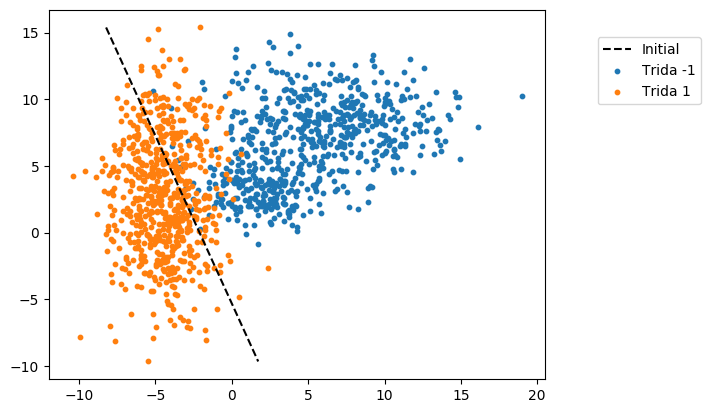

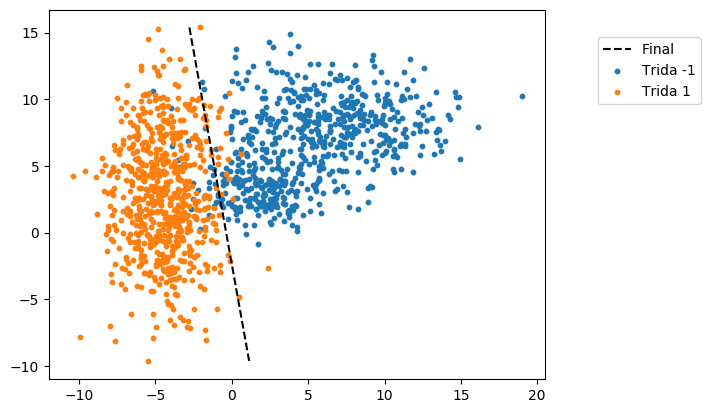

iter = 7000
  w = [-4.848003706951176; -0.7053368771966371],  b = -7.22000000000001
g norm w = 126.66722793754487
g norm b = 3.0
spatne = 76.0

iter = 8000
  w = [-15.070091955584001; -2.1831464138453094],  b = -7.5300000000000145
g norm w = 47.62099601231237
g norm b = 5.0
spatne = 46.0

iter = 9000
  w = [-16.186186888251356; -2.2145997386750333],  b = -8.670000000000034
g norm w = 47.62099601231237
g norm b = 5.0
spatne = 43.0

iter = 10000
  w = [-18.874903840750815; -2.9554398444158885],  b = -7.000000000000073
g norm w = 46.93017814506269
g norm b = 6.0
spatne = 44.0



PyObject <matplotlib.legend.Legend object at 0x7f0dee2093d0>

In [92]:
# inicializace
b0 = -20.0.*ones(size(X)[1])
x1 = X[:,1]
x2 = X[:,2]
c1 = [mean(x1[y.==-1]), mean(x2[y.==-1])]
c2 = [mean(x1[y.==1]), mean(x2[y.==1])]
w0 = c2 - c1
println("w0 = ", w0)
println("b0 = ", b0[1])

y_max = maximum(X[:,2])
y_min = minimum(X[:,2])

x_max = (-b0[1] .- w0[2].*y_max)./ w0[1]
x_min = (-b0[1] .- w0[2].*y_min)./ w0[1]
x_vis0 = collect(min(x_min,x_max): 0.001: max(x_min,x_max))
line0 = (-b0[1] .- w0[1].*x_vis0)./ w0[2]


fig = figure()
PyPlot.scatter(x1[y.==-1],x2[y.==-1], s=10, label="Trida -1")
PyPlot.scatter(x1[y.==1], x2[y.==1], s=10, label="Trida 1")
PyPlot.plot(x_vis0, line0, "k--", label = "Initial")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


##########################################################

w,b = grad_descend(X,y,w0,b0, 1.0e-2, 1.0e-2, 0.0, 0.0)


x_max = (-b[1] .- w[2].*y_max)./ w[1]
x_min = (-b[1] .- w[2].*y_min)./ w[1]
x_vis = collect(min(x_min,x_max): 0.001: max(x_min,x_max))

line = (-b[1] .- w[1].*x_vis)./ w[2]


fig = figure()
PyPlot.scatter(x1[y.==-1],x2[y.==-1], s=10, label="Trida -1")
PyPlot.scatter(x1[y.==1], x2[y.==1], s=10, label="Trida 1")
PyPlot.plot(x_vis, line, "k--", label = "Final")


legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

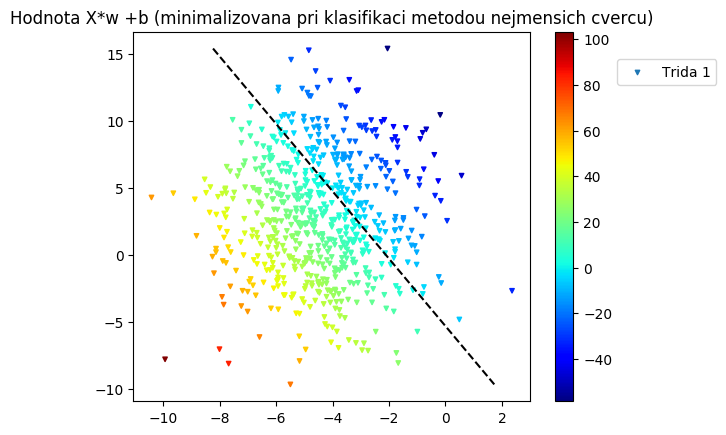

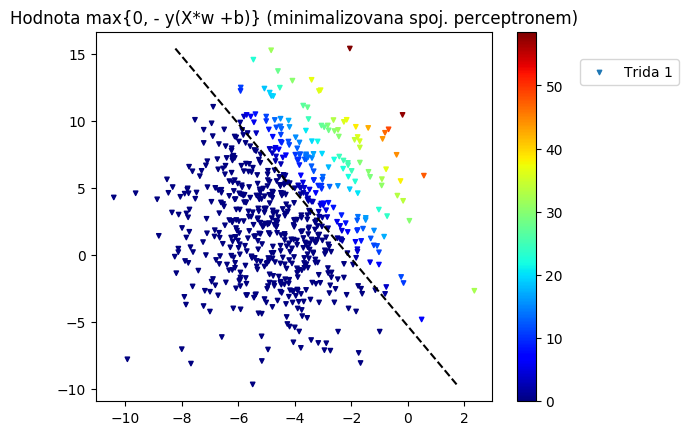

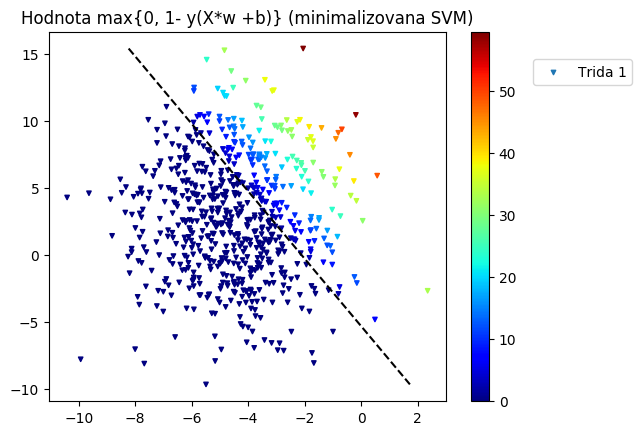

PyObject <matplotlib.legend.Legend object at 0x7f0dee6260d0>

In [96]:
# Srovnani ztratovych funkci
#   Nej. ctvrece = vsechny body maji vliv
#   Spojity percepnton = body klasifikovane dobre maji postupne nizsi vliv


hod=X*w0

fig = figure()
#scatter(x1[y.==-1],x2[y.==-1], c=vec(hod[y.==-1] .+b0[1]), marker="o", s=10, label="Trida -1")
scatter(x1[y.==1],x2[y.==1], c=vec(hod[y.==1] .+b0[1]), marker ="v", s=10, label="Trida 1", cmap="jet")

plot(x_vis0, line0, "k--")
colorbar()
title("Hodnota X*w +b (minimalizovana pri klasifikaci metodou nejmensich cvercu)")
legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=2.0)

###########################################################################################

hodnota = zeros(size(X)[1])
for i=1:size(X)[1]   
    hodnota[i]= max(0.0,- y[i]*(sum(X[i,:].*w0) + b0[i]))
end


fig = figure()
#scatter(x1[y.==-1],x2[y.==-1], c=hodnota[y.==-1], marker="o", s=10, label="Trida -1")
scatter(x1[y.==1],x2[y.==1], c=hodnota[y.==1], marker ="v", s=10, label="Trida 1",  cmap="jet")
plot(x_vis0, line0, "k--")
colorbar()
title("Hodnota max{0, - y(X*w +b)} (minimalizovana spoj. perceptronem)")
legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=2.0)

###########################################################################################

hodnota = zeros(size(X)[1])
for i=1:size(X)[1]   
    hodnota[i]= max(0.0, 1.0 - y[i]*(sum(X[i,:].*w0) + b0[i]))
end

fig = figure()
#scatter(x1[y.==-1],x2[y.==-1], c=hodnota[y.==-1], marker="o", s=10, label="Trida -1")
scatter(x1[y.==1],x2[y.==1], c=hodnota[y.==1], marker ="v", s=10, label="Trida 1",  cmap="jet")
plot(x_vis0, line0, "k--")
colorbar()
title("Hodnota max{0, 1- y(X*w +b)} (minimalizovana SVM)")
legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=2.0)